21891
43565537
7744133.4
3890.9999999999995
mt: 7586.400000020862

mb: 5026

m: 1.5094309590172825

b: -2650.1775567133936

y1: 338.49574214082577

y2: 413.96729009168985

Years and CO2: 
[[1980.          338.7       ]
 [1982.          341.1       ]
 [1984.          344.4       ]
 [1986.          347.2       ]
 [1988.          351.5       ]
 [1990.          354.2       ]
 [1992.          356.4       ]
 [1994.          358.9       ]
 [1996.          362.6       ]
 [1999.          366.6       ]
 [2000.          369.4       ]
 [2001.          370.19379228]
 [2002.          371.70322324]
 [2003.          373.2126542 ]
 [2004.          374.72208516]
 [2005.          376.23151612]
 [2006.          377.74094708]
 [2007.          379.25037803]
 [2008.          380.75980899]
 [2009.          382.26923995]
 [2010.          383.77867091]
 [2011.          385.28810187]
 [2012.          386.79753283]
 [2013.          388.30696379]
 [2014.          389.81639475]
 [2015.          391.32582571]
 [2016

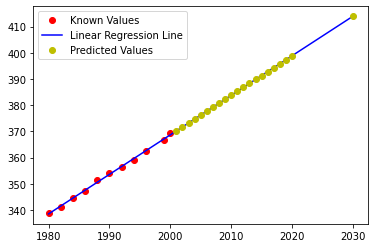

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Least Squares

def lst_square(x, y):

    sx = np.sum(x)
    sxy = np.inner(x,y)
    sxx = np.inner(x,x)
    sy = np.sum(y)
    n = len(x)
    print(sx)
    print(sxx)
    print(sxy)
    print(sy)
    mt = ((n*sxy) - (sx*sy))
    print("mt: {}\n".format(mt))

    mb = ((n*sxx) - (sx**2))
    print("mb: {}\n".format(mb))

    m = mt/mb
    b = (sy - (m*sx))/n 

    print("m: {}\n".format(m))
    print("b: {}\n".format(b))

    return (m, b)

# R^2
# p-value for R^2

# Predict future values

def future(y, x, m, b, time):
    
    for i in range(time):
        x = np.append(x,x[-1] + 1)
        y = np.append(y, (m*x[-1]) + b)
        
    x = np.append(x, 2030)
    y = np.append(y, (m*x[-1]) + b)
    return [x, y]

# plot graph

def visualize(y, x, m, b, color):

    # Plotting points
    
    plt.plot(x, y, color, label = "Known Values")

    # Plotting Least Squares Line

    px1 = 1980
    py1 = (m*px1) + b
    px2 = 2030
    py2 = (m*px2) + b
    print("y1: {}\n".format(py1))
    print("y2: {}\n".format(py2))
    plt.plot([px1, px2], [py1, py2], 'b', label = "Linear Regression Line")


# Main execution block

x = np.array([1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1999, 2000])
y = np.array([338.7, 341.1, 344.4, 347.2, 351.5, 354.2, 356.4, 358.9, 362.6, 366.6, 369.4])
time = 20 # Years

[m, b] = lst_square(x, y)
visualize(y, x, m, b, 'ro')

[x, y] = future(y, x, m, b, time)
x = np.reshape(x, [-1, 1])
y = np.reshape(y, [-1, 1])
table = np.concatenate([x, y], axis = 1)
print("Years and CO2: \n{}\n".format(table))

plt.plot(x[11:], y[11:], 'yo', label = "Predicted Values")
plt.legend()
plt.show()